__Grupo 19:__ 
   - Héctor Gorlat Muñoz,
   - Pablo Cos Ruiz,
   - Antonio López González,

# MODELO ECONOMÉTRICO

En este proyecto, intentamos explicar el número de robos en función de varias variables a nivel de comunidad autónoma de España, es decir, planteamos un modelo lineal en el que nuestra variable Y o explicada es el número de robos por comunidad. Las variables escogidas para explicar nuestra variable endógena son:
- PIB
- Pobreza
- Paro
- Préstamo de libros
- Inmigrantes americanos (ext2)
- Inmigrantes africanos  (ext)


Todas estas variables estan definidas por comunidad autónoma.

##   Introducimos las librerías con las que vamos a partir

In [322]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import seaborn as sns
from wooldridge import *

## Evaluación modelo elegido (mco)

Primero,  vamos a hacer que Jupyter lea nuestro Excel, definiendo ya nuestras variables, y a continuación, realizaremos mínimos cuadrados oridnarios para empezar a conocer la validez de nuestro modelo.

In [323]:
#Datos de basedatos
import pandas as pd
datos = pd.read_excel('basedatos.xlsx', delimiter=";")
y=datos['robo']
X=datos[['PIB','ext','ext2','Npobreza','Nparo','Nlibro']]
mco2 = sm.OLS(y, sm.add_constant(X)).fit()
mco2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   robo   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     3.079
Date:                Fri, 10 Dec 2021   Prob (F-statistic):             0.0461
Time:                        17:01:06   Log-Likelihood:                -46.526
No. Observations:                  19   AIC:                             107.1
Df Residuals:                      12   BIC:                             113.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4212      4.354      0.097      0.925      -9.066       9.908
PIB            1.2684      1.238      1.024      0.326      -1.429       3.966
ext            0.4351      0.273      1.591      0.138      -0.161       1.031
ext2           0.1792      0.094      1.898      0.082      -0.026       0.385
Npobreza      -5.1405      1.561     -3.292      0.006      -8.543      -1.738
Nparo          4.3817      1.478      2.966      0.012       1.163       7.601
Nlibro        -5.9051      2.843     -2.077      0.060     -12.099       0.289
==============================================================================
Omnibus:                        0.580   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.748   Jarque-Bera (JB):                0.319
Skew:                          -0.302   Prob(JB):                        0.853
Kurtosis:                       2.806   Cond. No.                         199.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Tras numerosos intentos, y nuevas variables, conseguimos que el modelo se correcto y globalmente significativo.

# Multicolinealidad

Para empezar este análisis debemos empezar observando el número de condición de nuestro modelo, en la tabla anterior podemos conocer su valor, Cond. No = 1.99e+05, que es muy superior a 900, valor límite para este análisis. Por tanto, deberemos proceder analizando los vifs de nuestro modelo.

In [324]:
import statsmodels.stats.outliers_influence as oi

vifs=[oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vifs

[2.26239238550383,
 8.936349490712391,
 8.077568436765262,
 3.420697007468819,
 3.339323685035686,
 3.5338305759256543]

Todos los valores se encuentran por debajo de 20, lo que indica que nuestro modelo no tiene problemas de multicolinealidad. Al principio, nuestro modelo si tenían problemas con las variables, por lo que tuvimos que corregir el problema haciendo logartimo y normalizando nuestras variables.

Para seguir analizando la multicolinealidad, realizaremos la matriz de correlación y su gráfica.

In [325]:
corr_matrix=np.corrcoef(X.T)
print(corr_matrix)

[[ 1.00000000e+00 -1.83688077e-01 -2.27580636e-01  9.40471514e-02
   1.34361141e-01 -8.50886052e-06]
 [-1.83688077e-01  1.00000000e+00  8.78368629e-01  2.17876468e-06
  -2.46771187e-02  8.90134225e-01]
 [-2.27580636e-01  8.78368629e-01  1.00000000e+00 -1.17986162e-01
  -1.52771153e-01  8.92231610e-01]
 [ 9.40471514e-02  2.17876468e-06 -1.17986162e-01  1.00000000e+00
   8.32447609e-01 -2.20642690e-01]
 [ 1.34361141e-01 -2.46771187e-02 -1.52771153e-01  8.32447609e-01
   1.00000000e+00 -2.07242162e-01]
 [-8.50886052e-06  8.90134225e-01  8.92231610e-01 -2.20642690e-01
  -2.07242162e-01  1.00000000e+00]]


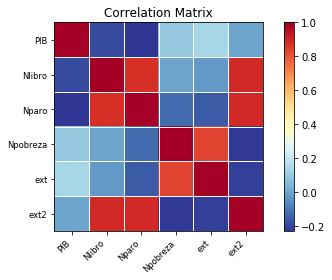

In [326]:
import statsmodels.graphics.api as smg
smg.plot_corr(corr_matrix, xnames=["PIB","Nlibro", "Nparo", "Npobreza","ext","ext2"])
plt.show()

Con los siguientes gráficos podremos ver la normalidad de nuestros datos y analizar su correlación.

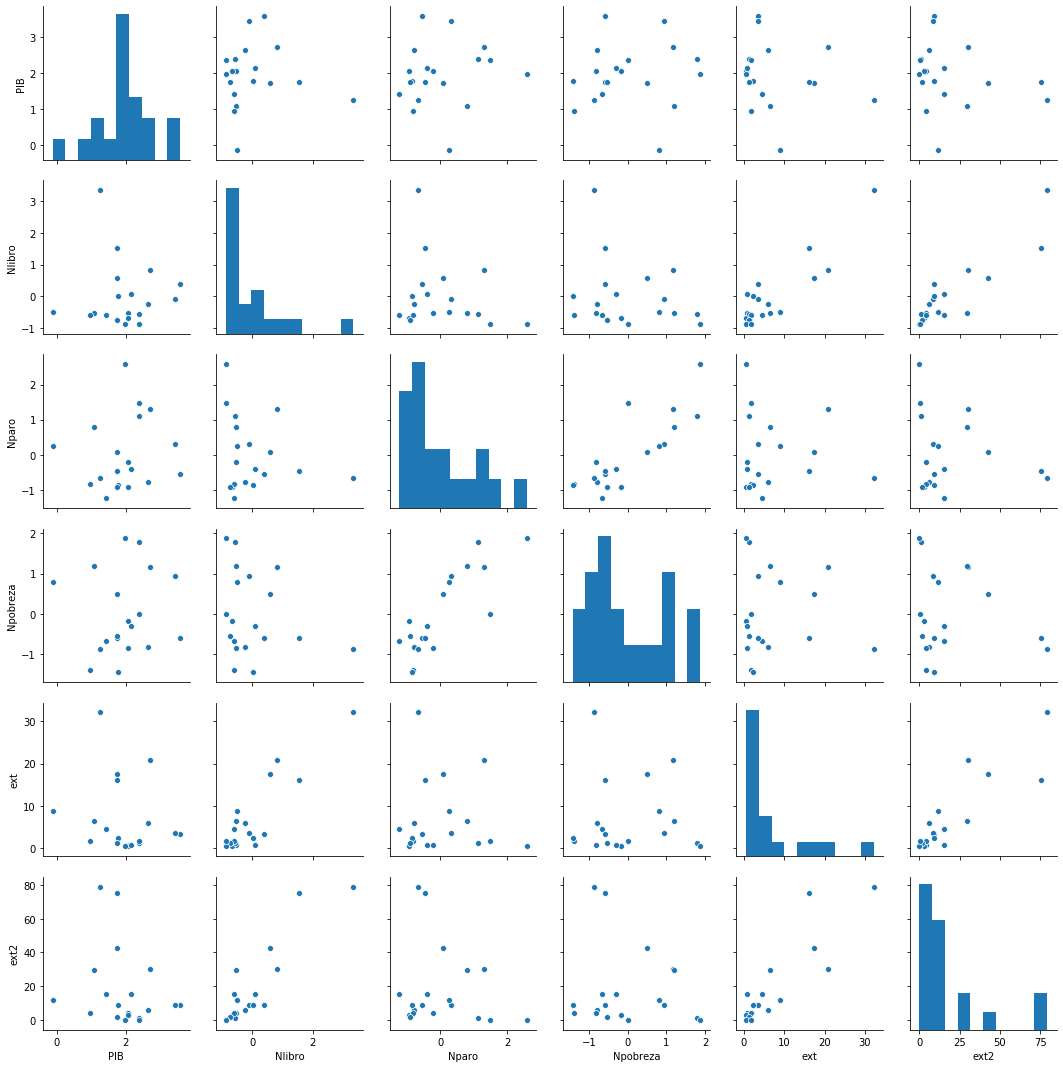

In [327]:
sns.pairplot(datos[['PIB','Nlibro','Nparo','Npobreza','ext','ext2']])

Text(0, 0.5, 'Nlibro')

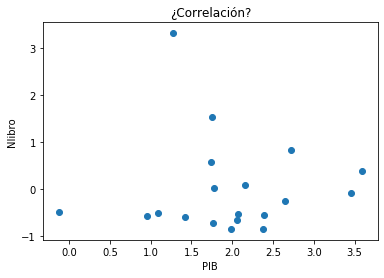

In [328]:
plt.scatter(datos['PIB'],datos['Nlibro'])
plt.title('¿Correlación?')
plt.xlabel('PIB')
plt.ylabel('Nlibro')

El test de Shapiro es un método analítico para comprobar si una variable sigue una distribución normal o no. Si el p_valor que
nos arroja es menos a 0.05 la variable cumple la hipótesis de normalidad. 

In [329]:
estadistico, p_value = shapiro(datos[['Npobreza']])
print('estadistico=%.3f,p_value=%3f' % (estadistico,p_value))

estadistico=0.923,p_value=0.129412


#  Normalidad de los residuos

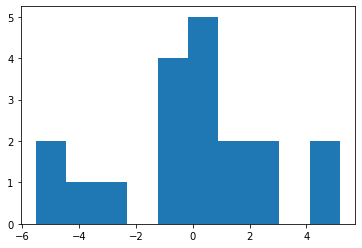

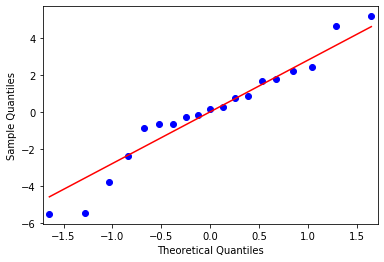

In [330]:
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
pyplot.hist(mco1.resid)
pyplot.show()
qqplot(mco1.resid, line='s')
pyplot.show()

In [331]:
estadistico, p_value = shapiro(mco1.resid)
print('estadistico=%.3f,p_value=%3f' % (estadistico,p_value))

estadistico=0.952,p_value=0.430780


Después del análisis de los residuos, podemos confirmar la hipótesis de linealidad y normalidad de estos.

# Heteroscedasticidad 

El siguiente paso, es estudiar la heteroscedasticidad, es decir, analizar el comportamiento de la varianza del término perturbación, si es constante o no.
A continuación, vamos a utilizar métodos gráficos como el de residuos y de dispersión, y métodos analíticos, como el de Goldfelt-Quandt y Glesjer. Elegimos esos métodos analíticos porque la muestra es pequeña (19) y queremos estudiar casos concretos.

In [332]:
gq=sms.het_goldfeldquandt(mco1.resid, mco.model.exog)

print(gq)

(308.55177548570725, 0.00033650037661035775, 'increasing')


El test Goldfelt-Quandt nos confirma que existe **HETEROSCEDASTICIDAD** en nuestro modelo. El p_valor=0,0003365, nos lleva a rechazar la hipótesis nula de homoscedasticidad. 

Para averiguar, y posteriormente corregir dónde esta el problema de heteroscedasticidad, prodeceremos a utilizar el test de Glejser. Después corregiremos mediante mínimos cuadrados ponderados.

In [337]:
#GLESJER
z = x['Npobreza']
for h in [-3,-2,-1,1,2,3]:
    mcoaux = sm.OLS(abs(mco.resid), sm.add_constant(z**h)).fit()
    pval = mcoaux.pvalues[1]
    print('h:',h,'-> pvalt:',pval,';R2:',mcoaux.rsquared)

h: -3 -> pvalt: 0.08898240352253692 ;R2: 0.16067461869739086
h: -2 -> pvalt: 0.08935259924266888 ;R2: 0.16033476939021563
h: -1 -> pvalt: 0.11625295694468511 ;R2: 0.1387719457897597
h: 1 -> pvalt: 0.4677793705870409 ;R2: 0.031430776726142806
h: 2 -> pvalt: 0.8039957398525395 ;R2: 0.0037242078749044616
h: 3 -> pvalt: 0.7607433678344422 ;R2: 0.005601186071417796


Aquí, tenemos un error cuando metemos las variables 'ext' y 'ext2'. Además, con el resto de variables no podemos introducir valores decimales de h, por eso el intervalo de esta solo tiene números enteros.

Aun así, seguiremos con la corrección por mínimos cuadrados ponderados de las variables que no nos da error (4 de 6 variables).

In [338]:
mcp= sm.WLS(y, sm.add_constant(x), weights=1./np.sqrt(z**2)).fit()
mcp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                   robo   R-squared:                       0.948
Model:                            WLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     36.14
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           5.31e-07
Time:                        17:02:56   Log-Likelihood:                -45.858
No. Observations:                  19   AIC:                             105.7
Df Residuals:                      12   BIC:                             112.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0506      4.677      0.652      0.527      -7.140      13.241
PIB            0.8572      1.358      0.631      0.540      -2.102       3.816
Nlibro        -5.5582      2.766     -2.010      0.068     -11.585       0.468
Nparo          7.1349      0.748      9.540      0.000       5.505       8.765
Npobreza      -7.0579      1.274     -5.540      0.000      -9.833      -4.282
ext            0.0003      0.000      0.999      0.338      -0.000       0.001
ext2           0.0002   9.89e-05      1.935      0.077   -2.41e-05       0.000
==============================================================================
Omnibus:                        4.348   Durbin-Watson:                   2.256
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                2.814
Skew:                          -0.940   Prob(JB):                        0.245
Kurtosis:                       3.152   Cond. No.                     2.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#  Autocorrelación

Para estudiar si existe un problema de autocorrelación, realizamos el contraste de Durbin-Watson.

In [339]:
mco4=sm.OLS(y, sm.add_constant(X)).fit()
mco4.summary()
from statsmodels.stats.stattools import durbin_watson
dw=durbin_watson(mco4.resid)
print(dw)

2.03380209118168


Como el valor obtenido es aproximadamente 2, no tenemos correlación en el modelo. No debemos hacer ninguna corrección.

#  Predicción

A causa de los problemas ejecutando los test de heteroscedastidad, no hemos logrado obtener homoscedasticidad completa en el modelo por las variables 'ext' y 'ext2'. Aunque nuestro modelo no tenga total exactitud por dicho problema, si hemos podido llegar a varias conclusiones.

Para finalizar, y teniendo en cuenta lo obtenido anteriormente, podemos asegurar que los robos producidos por comunidad   autónoma en España, dependen negativamente de los prestamos de libros en la zona y la pobreza existente en la misma, y positivamente del porcentaje de paro acumulado en dicha comunidad. Además, según nuestro modelo, el PIB en la zona no afecta a los robos (no significativamente). Por último, centrándonos en las dos variables relacionadas con los extranjeros no hemos podido concretar su incidencia exacta en los robos producidos debido a los problemas comentados antes.